# **Multiple Linear Regression Modeling Techniques**

In [1]:
# Import Python Libraries
import numpy as np
import pandas as pd

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
try :
    df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
    print('Data Connection Sucessfully Completed.')
except:
    print('Check your Data Connection.')

Data Connection Sucessfully Completed.


In [3]:
# Checking Data Statistics:

def stats(df):
    print('*'*40)
    print('Dataset Information: ',df.info())
    print('*'*40)
    print('Information About Dataset : ',df.shape) 
stats(df)

****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
Dataset Information:  None
****************************************
Information About Dataset :  (10000, 6)


In [4]:
# Custome Descriptive Stats Report:

from collections import OrderedDict
import numpy as np
numerical_result = []

for i in df.columns:
    if df[i].dtypes != 'object':
        stats_dict = OrderedDict({
        'Feature':i,
        'Min': df[i].min(),
        'Q1': np.percentile(df[i],25),
        'Mean':np.percentile(df[i],50),
        'Q3': np.percentile(df[i],75),
        'IQR': np.percentile(df[i],75) - np.percentile(df[i],25),
        'Max': df[i].max(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt()
    })
    
    numerical_result.append(stats_dict)
    
result = pd.DataFrame(numerical_result)
result

,Feature,Min,Q1,Mean,Q3,IQR,Max,Variance,Skewness,Kurtosis
0,Hours Studied,1.0,3.0,5.0,7.0,4.0,9.0,6.704520,-0.004213,-1.232144
1,Previous Scores,40.0,54.0,69.0,85.0,31.0,99.0,300.784930,0.004502,-1.213237
2,Previous Scores,40.0,54.0,69.0,85.0,31.0,99.0,300.784930,0.004502,-1.213237
3,Sleep Hours,4.0,5.0,7.0,8.0,3.0,9.0,2.875951,-0.039474,-1.256888
4,Sample Question Papers Practiced,0.0,2.0,5.0,7.0,5.0,9.0,8.221683,-0.035636,-1.214557
5,Performance Index,10.0,40.0,55.0,71.0,31.0,100.0,369.122377,-0.001740,-0.860523


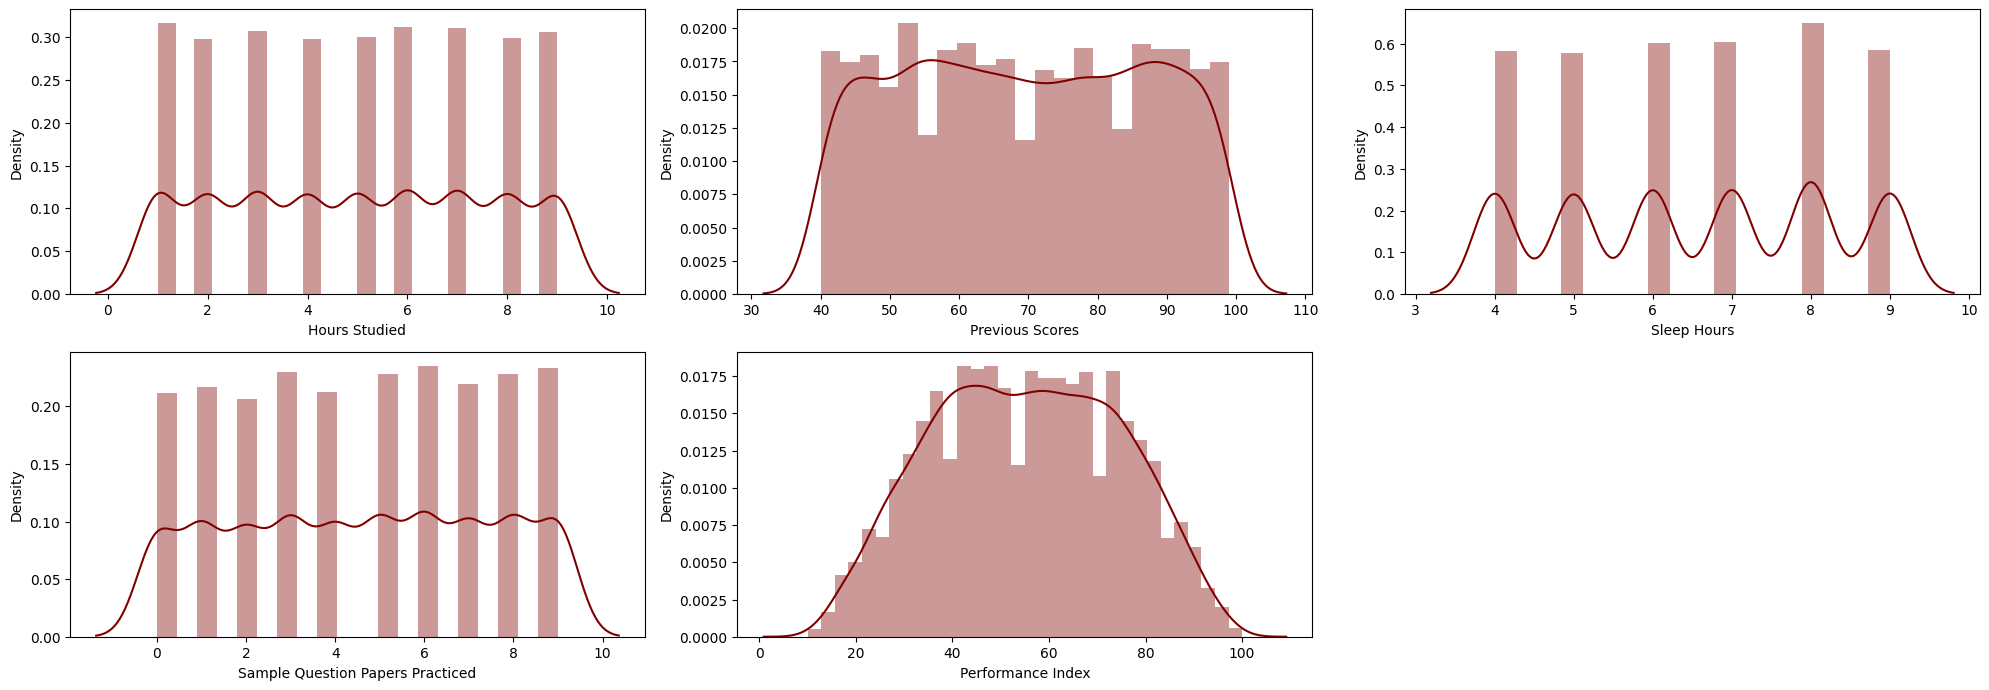

In [5]:
# Checking Data Distribution Nature:

plt.figure(figsize = (20,10))
plot = 1

for i in df.columns:
    if df[i].dtype != 'object':
        plt.subplot(3,3,plot)
        plt.subplot(3,3,plot)
        sns.distplot(df[i],color = 'maroon')
        plt.xlabel(i)
        plt.ylabel('Density')
        plot+=1
plt.tight_layout()    
plt.show()

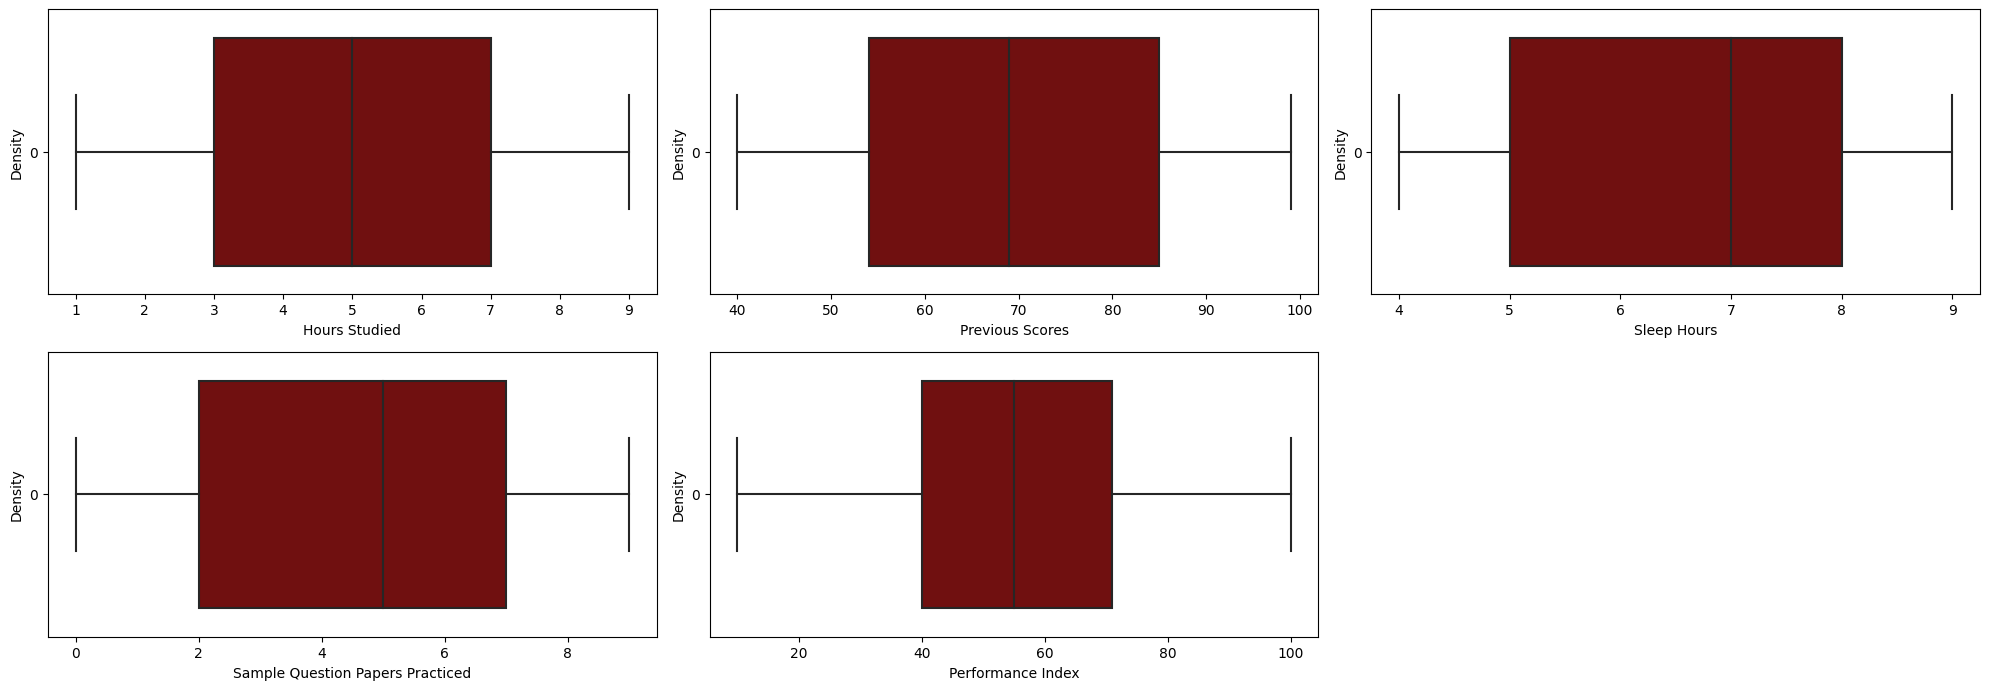

In [6]:
# Checking Outliers in Dataset:

plt.figure(figsize = (20,10))
plot = 1

for i in df.columns:
    if df[i].dtype != 'object':
        plt.subplot(3,3,plot)
        plt.subplot(3,3,plot)
        sns.boxplot(df[i],color = 'maroon',orient= 'horizontal')
        plt.xlabel(i)
        plt.ylabel('Density')
        plot+=1
plt.tight_layout()    
plt.show()

In [7]:
# Data Cleaning using Map Function
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1,'No':0})

In [8]:
# Machine Learning Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def model_evaluation(data):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1:]
    
    # Train Test Split using Sklearn Library
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 33)
    
    # Model Building using LinearRegression
    modelLR = LinearRegression()
    modelLR.fit(X_train,y_train)
    y_pred = modelLR.predict(X_test)
    
     # Model Building using RidgeRegression
    modelRidge = Ridge(alpha = 1,solver = 'cholesky')
    modelRidge.fit(X_train,y_train)
    y_pred_ridge = modelRidge.predict(X_test)
    
    # Model Building using LassoRegression
    modelLasso = Lasso(alpha = 10)
    modelLasso.fit(X_train,y_train)
    y_pred_lasso = modelLasso.predict(X_test)
   
     # Evaluating Model Metrics using LinearRegression
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    
    # Evaluating Model Metrics using Ridge Regression
    r2_ridge = r2_score(y_test,y_pred_ridge)
    mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
    mse_ridge = mean_squared_error(y_test,y_pred_ridge)
    
    # Evaluating Model Metrics using Ridge Regression
    r2_lasso = r2_score(y_test,y_pred_lasso)
    mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
    mse_lasso = mean_squared_error(y_test,y_pred_lasso)
    return r2,r2_ridge,r2_lasso,mse,mse_ridge,mse_lasso
    

r2,r2_ridge,r2_lasso,mse,mse_ridge,mse_lasso = model_evaluation(df)

In [9]:
print('R2 Score for Linear Regression is ',round(r2,3))
print('R2 Score for Ridge Regression is ',round(r2_ridge,3))
print('R2 Score for Lasso Regression is ',round(r2_lasso,3))

R2 Score for Linear Regression is  0.989
R2 Score for Ridge Regression is  0.989
R2 Score for Lasso Regression is  0.947


In [10]:
print('RMSE for Linear Regression Model ',np.sqrt(mse))
print('RMSE for Ridge Regression Model ',np.sqrt(mse_ridge))
print('RMSE for Lasso Regression Model ',np.sqrt(mse_lasso))

RMSE for Linear Regression Model  2.054512782832942
RMSE for Ridge Regression Model  2.0545121445410803
RMSE for Lasso Regression Model  4.4449286590536
